In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("white")
df = pd.read_csv("../data/Advertising.csv", index_col=0)


In [3]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


TypeError: Axes.set() takes 1 positional argument but 2 were given

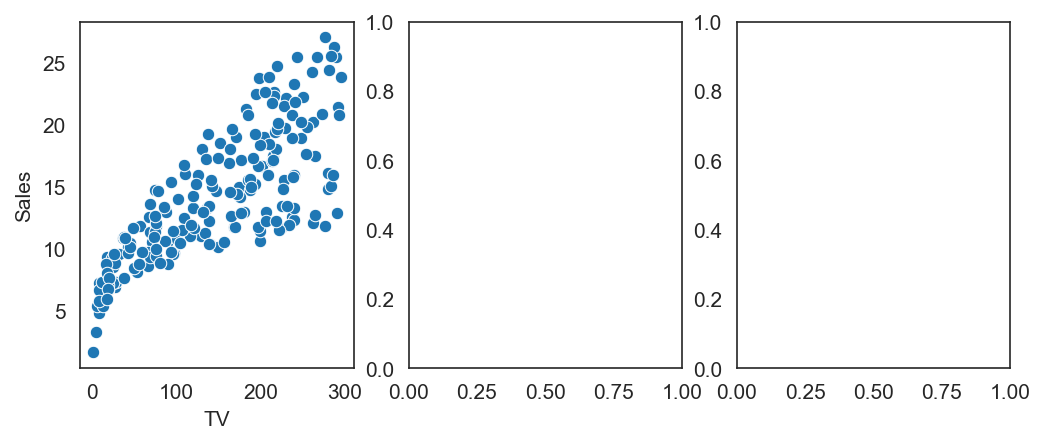

In [10]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8,3),  dpi = 150)

df.columns[:-1]
for (i, feature) in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y="Sales", ax=ax[i])
    ax[i].set(f"Spending on {feature}")

fig = 

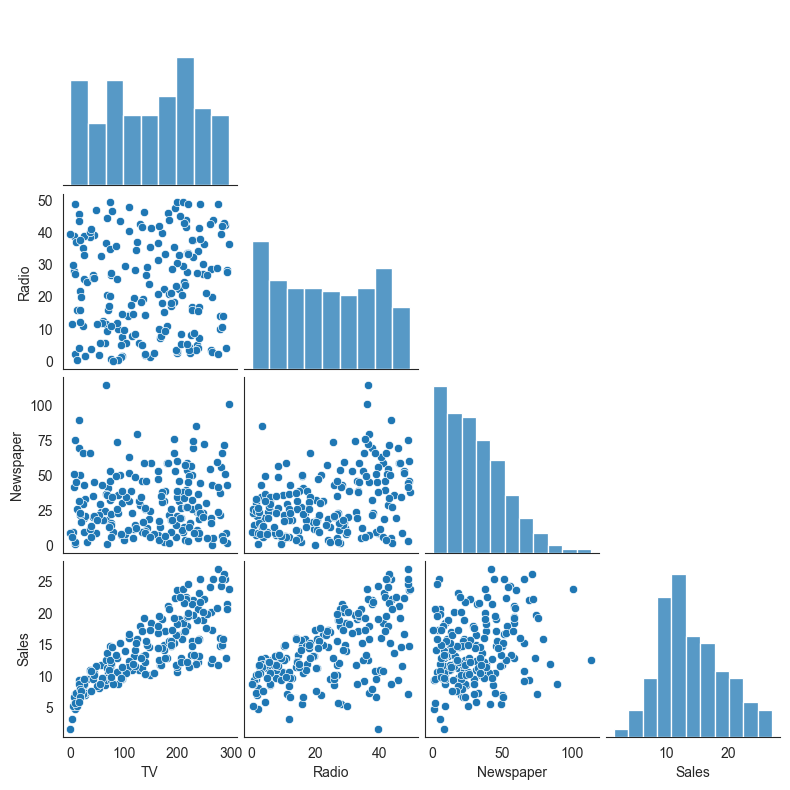

In [11]:
ax = sns.pairplot(df, corner=True, height=2)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'Regression line on TV advertisement and sales')]

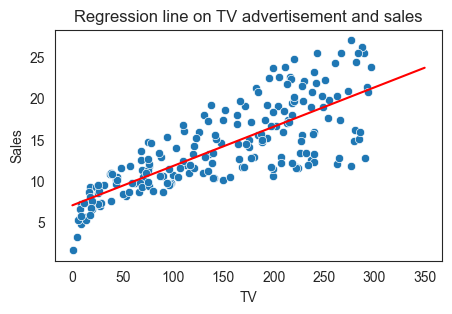

In [18]:
X, y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1*x

print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color = "red")
ax.set(title = "Regression line on TV advertisement and sales")


<Axes: xlabel='TV', ylabel='Sales'>

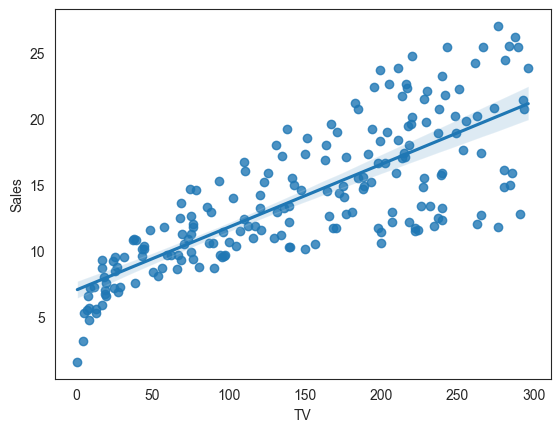

In [19]:
sns.regplot(x=X, y=y)

In [23]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(f"TV: $230.1k, Radio: $37.8k, Newspaper: $69.2 predicts {y_hat:.1f} thousand units")


TV: $230.1k, Radio: $37.8k, Newspaper: $69.2 predicts 20.5 thousand units


In [24]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)

test = df.drop(train.index)

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")


Shape of X_train: (140, 4)
Shape of X_test: (60, 4)
Shape of y_train: (140,)
Shape of y_test: (60,)


In [28]:
beta_hat = regression_fit(X_train, y_train)
print(f"regression coefficient beta: {beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

regression coefficient beta: 0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [34]:
m = len(y_test, )
y_hat = np.reshape(y_hat, (m))

MAE = np.divide(1, m) * np.sum(np.abs(y_test - y_hat))
MSE = np.divide(1, m) * np.sum(np.square(y_test - y_hat))
RMSE = np.sqrt(MSE)

print(f"MAE: {MAE}k units, MSE: {MSE}k units, RMSE: {RMSE}k units")

MAE: 1.3244490959726218k units, MSE: 3.540425618238503k units, RMSE: 1.8816018755939055k units
